In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
pd.set_option('display.max_columns', None)
sns.set('notebook') #Setting notebook display and all columns

In [4]:
data = pd.read_csv(r"F:\DSA\Data Sets ICT\Employee.csv") #reading CSV files

In [5]:
data.head() #displaying the files

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
data.shape

(74498, 24)

In [7]:
data.info() #Basic data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [8]:
data.describe(include = np.number) #Numerical Descriptive Analysis

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [9]:
data.describe(include = 'object') #Object Data Analysis

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498,74498,74494,74498,74494,74498,74493,74494,74493,74496,74495,74498,74498,74498,74496,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40826,19322,28157,37245,44716,50157,22331,37417,29778,37230,60297,70845,62394,37182,29619,39128


In [10]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [11]:
#Mode imputaion seems a viable option since the % of values are really really small
null_cols = ['Work-Life Balance', 'Performance Rating', 'Number of Promotions',
    'Education Level', 'Marital Status', 'Number of Dependents',
    'Job Level', 'Company Size', 'Remote Work', 'Employee Recognition']
for col in null_cols:
    mode = data[col].mode()[0]  # Calculate mode
    data[col].fillna(mode, inplace=True)  #Filling missing values with mode

In [12]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

## Univariate Distribution Analysis

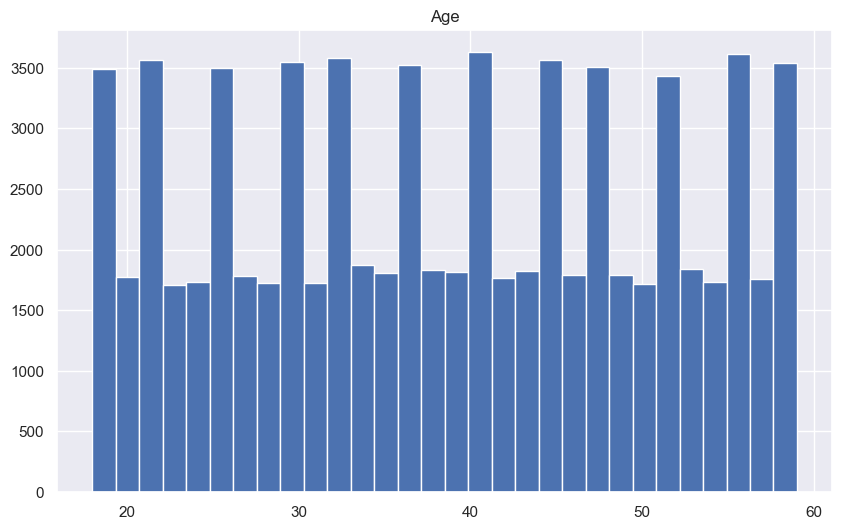

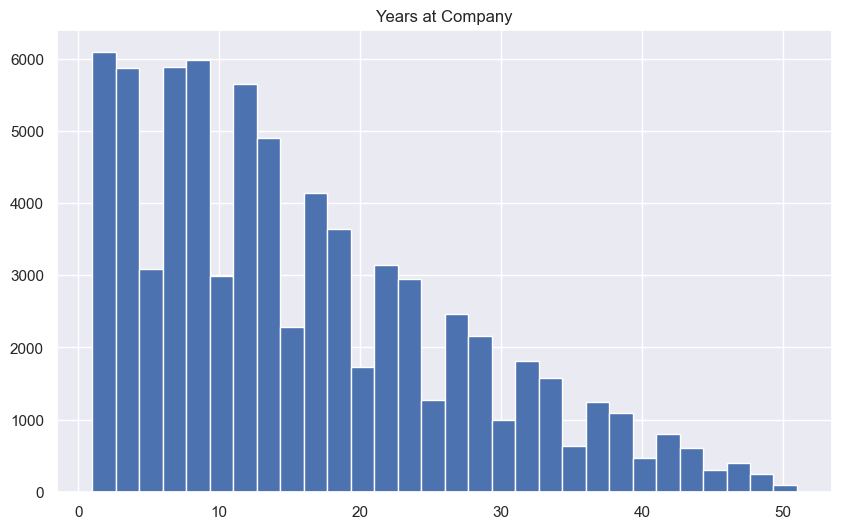

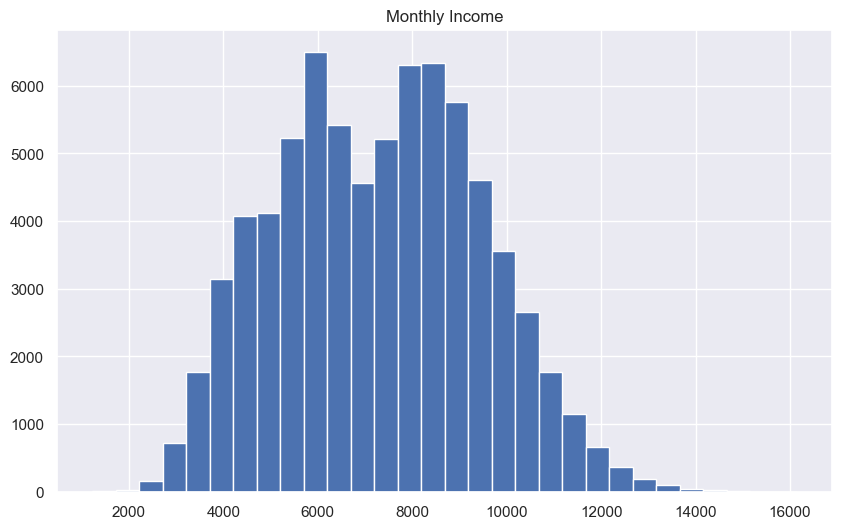

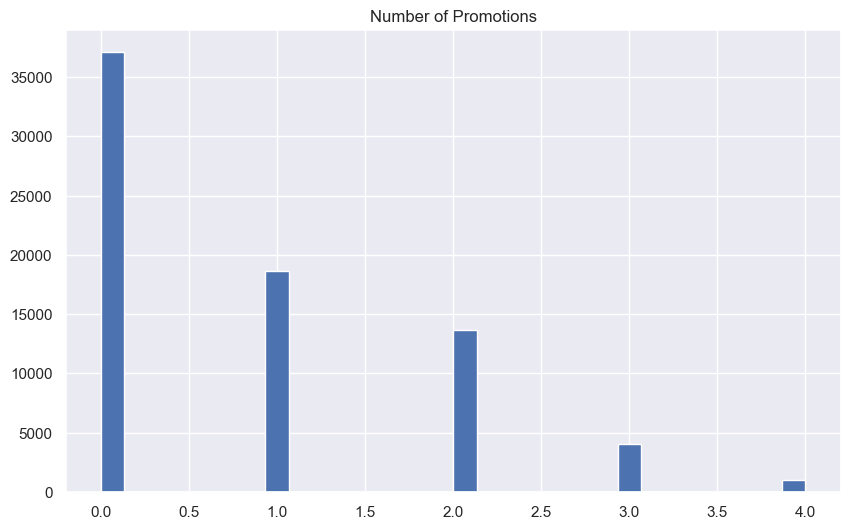

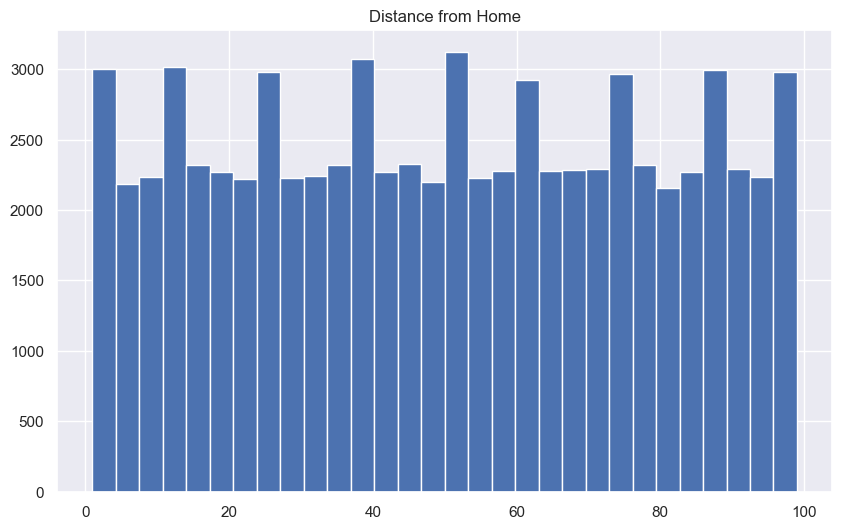

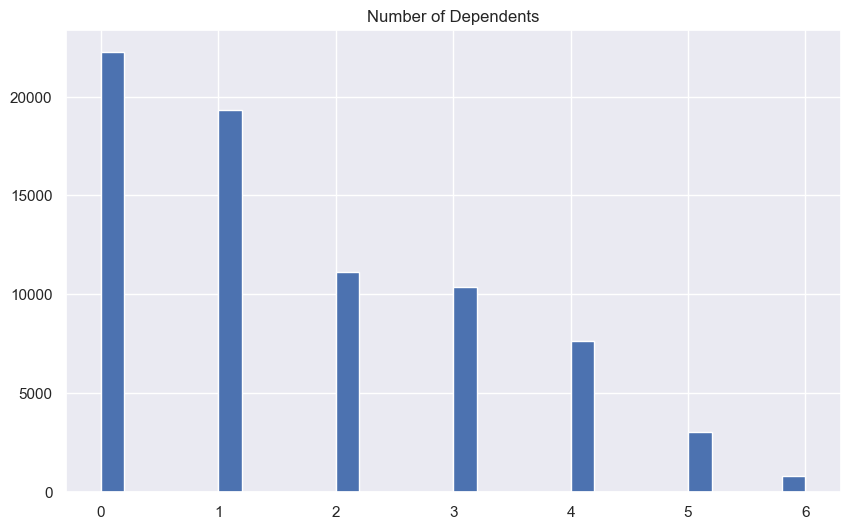

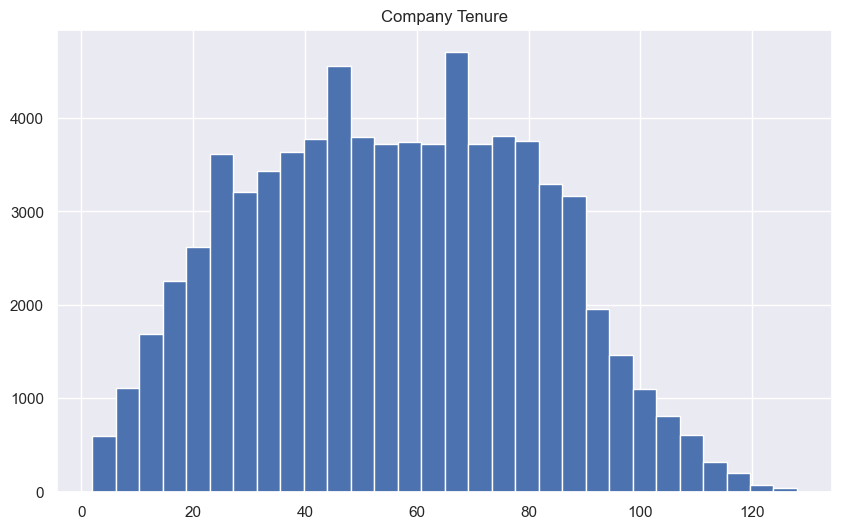

In [13]:
#Distribution checking
num_cols = data.select_dtypes(include = np.number).columns
for col in num_cols:
    if col!= 'Employee ID':
        data[col].hist(figsize = (10,6), bins = 30)
        plt.title(col)
        plt.show()

### Observations

1. Monthly Salary and Company Tenure has an almost normal distribution
2. Number of Promotions and Number of Dependents can be treated as a categorical variable since they are discrete values

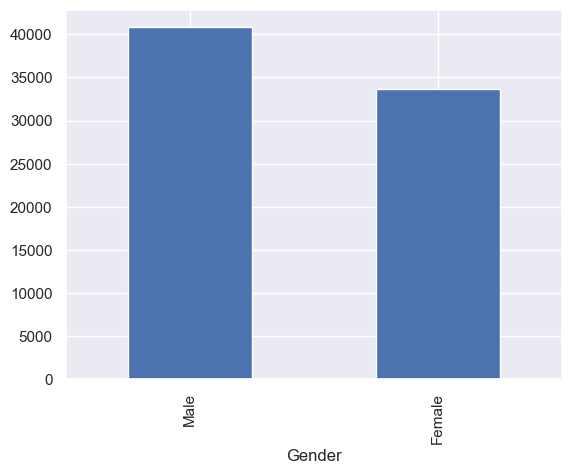

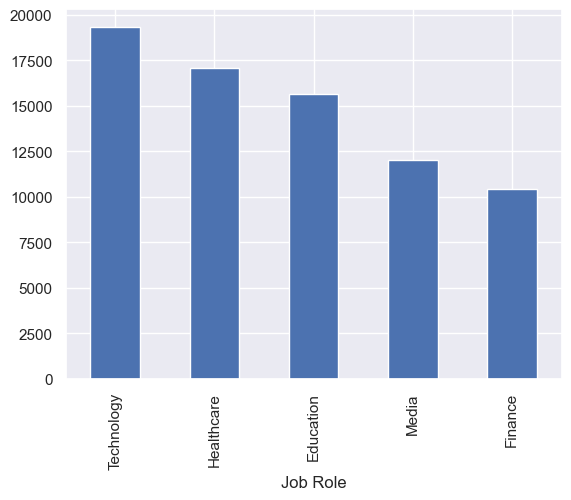

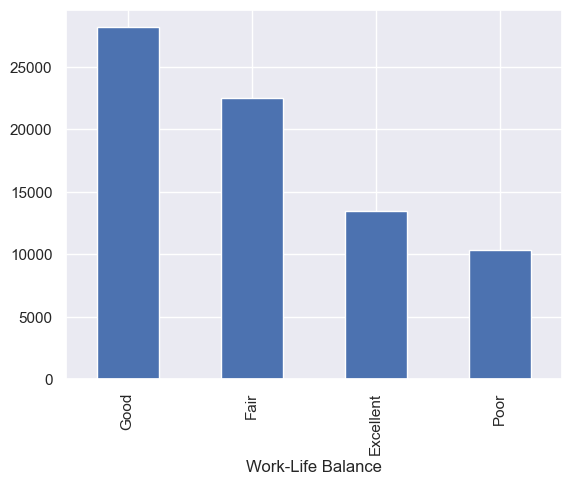

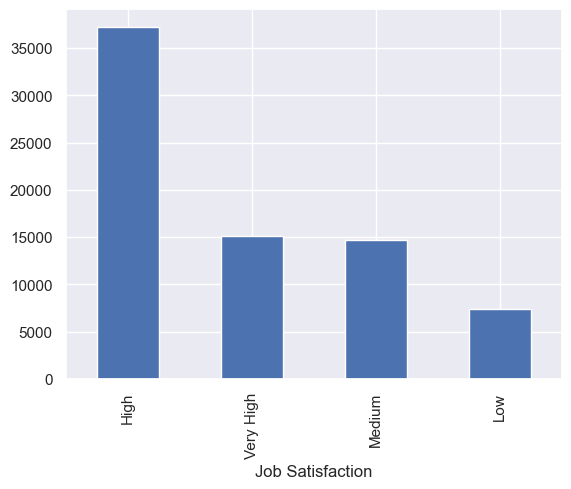

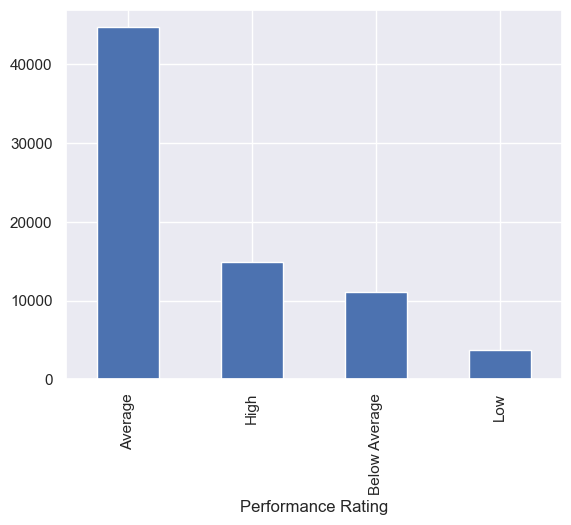

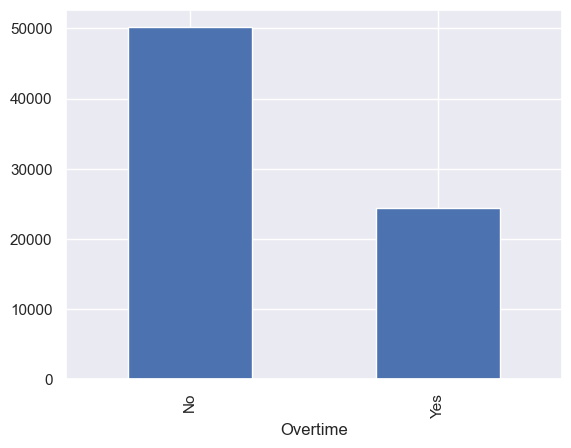

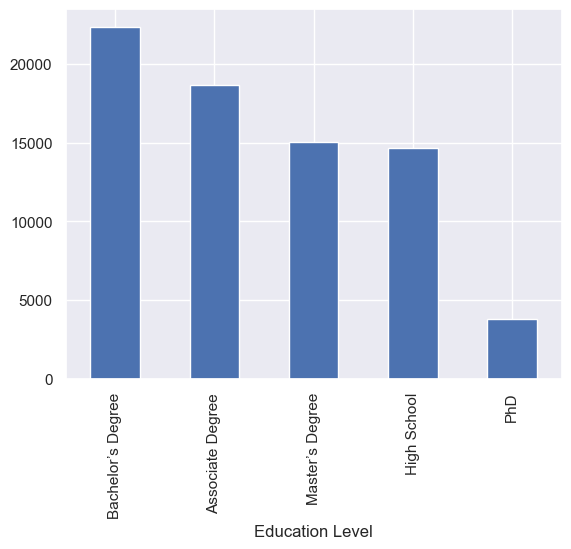

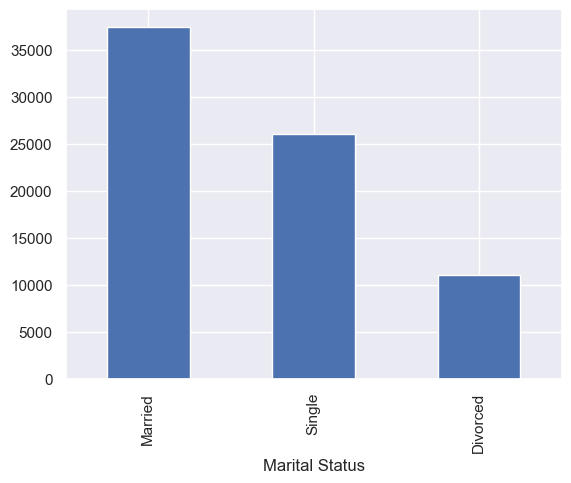

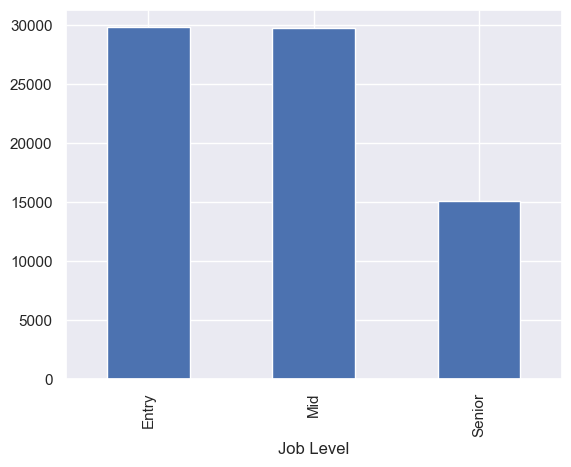

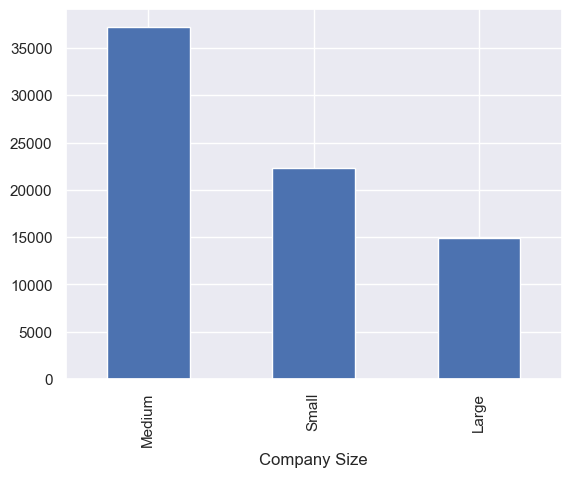

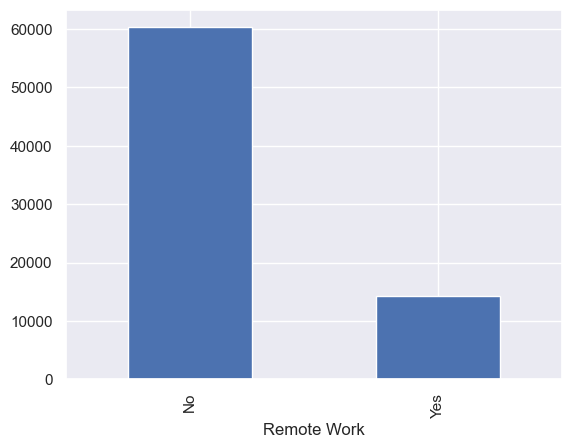

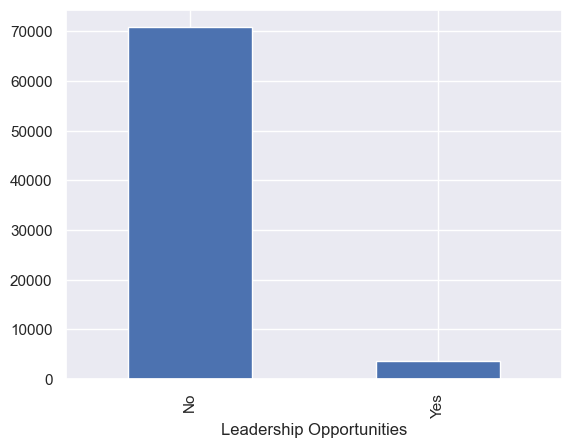

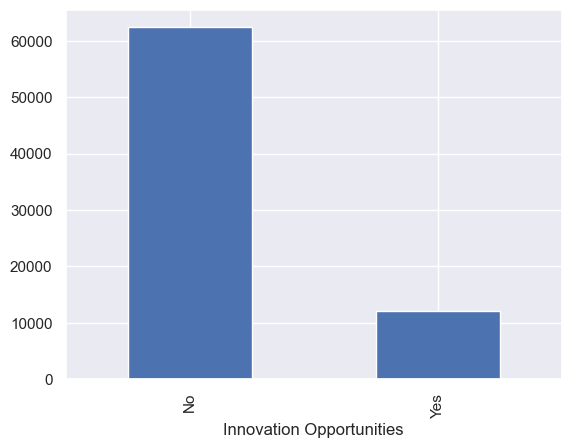

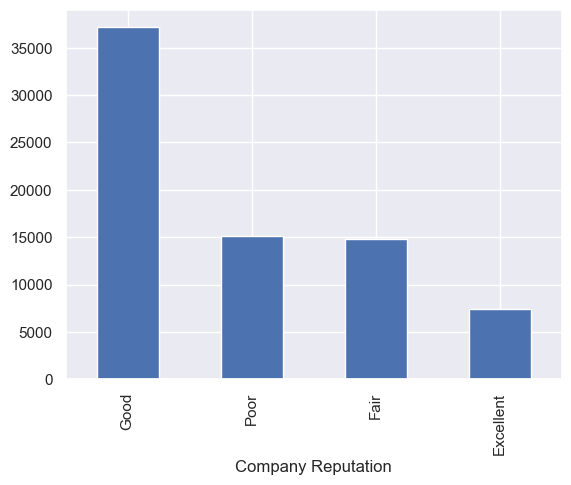

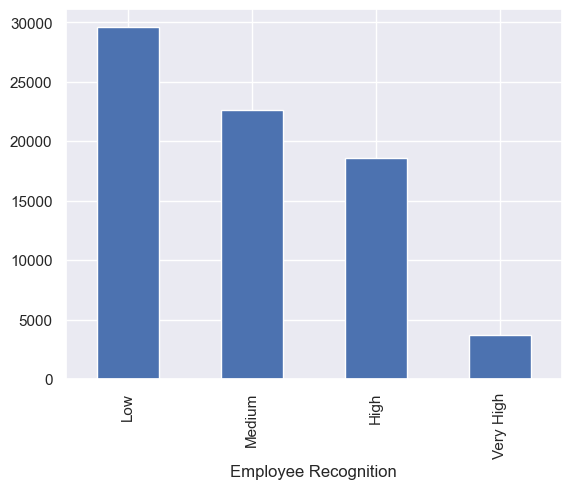

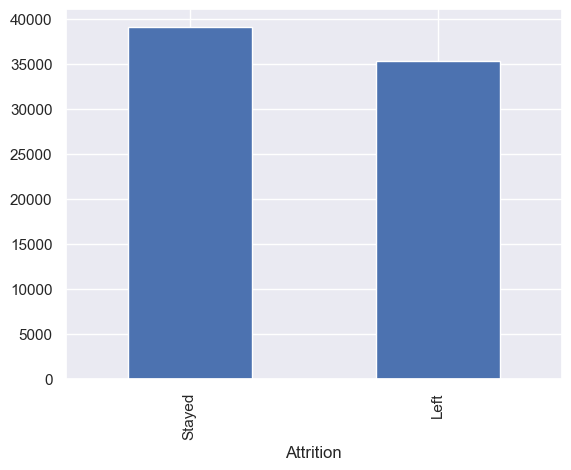

In [14]:
#Distribution of the categorical variables
obj_cols = data.select_dtypes(include = 'object').columns
for col in obj_cols:
    data[col].value_counts().plot(kind = 'bar')
    plt.show()

## Bivariate Analysis

In [15]:
#Converting target variable into one and zero for KDE Analysis
data['Attrition'] = data['Attrition'].apply(lambda x: 0 if 'Stayed' in x else 1)

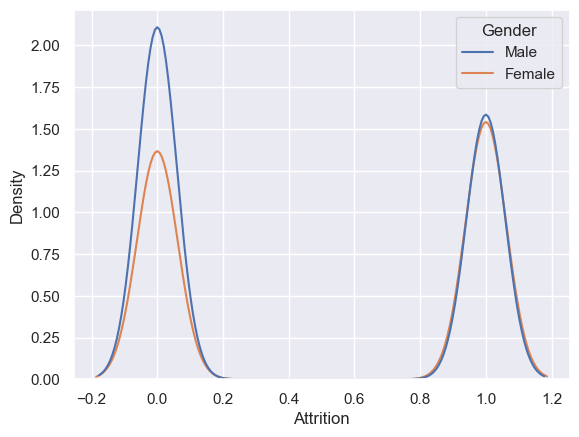

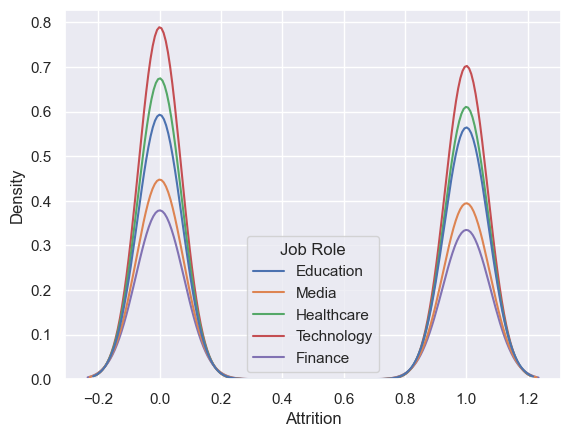

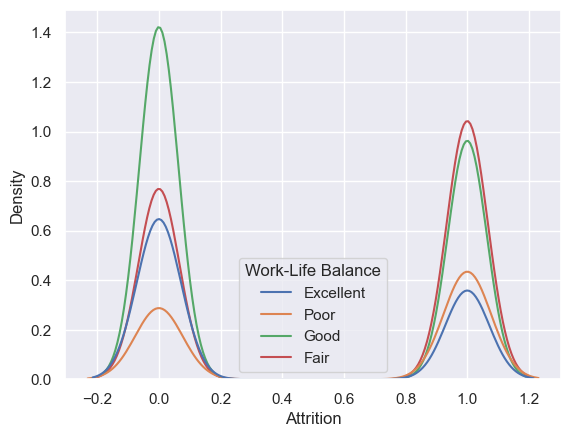

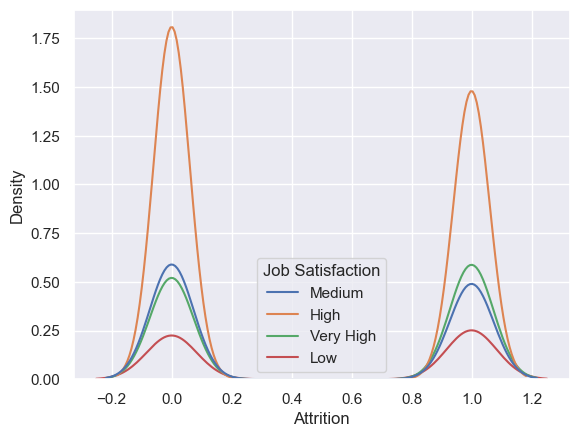

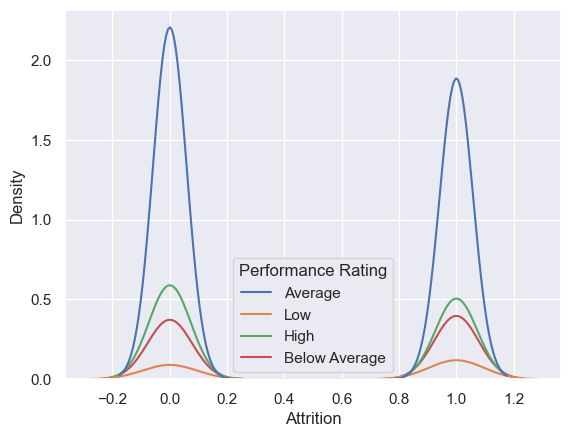

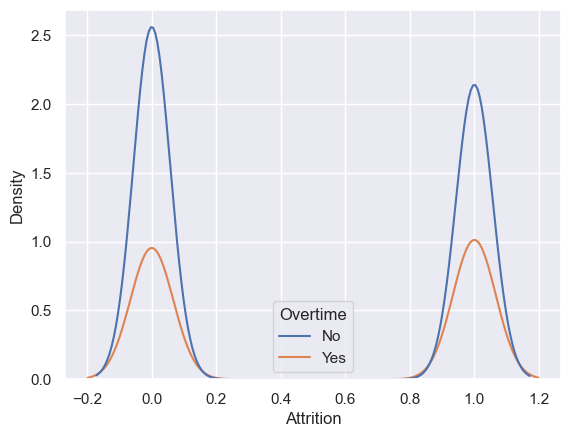

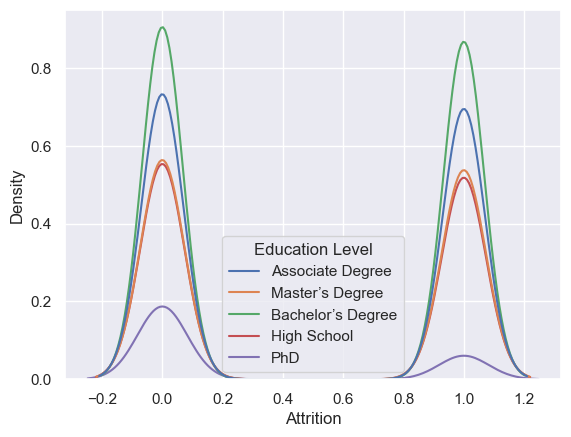

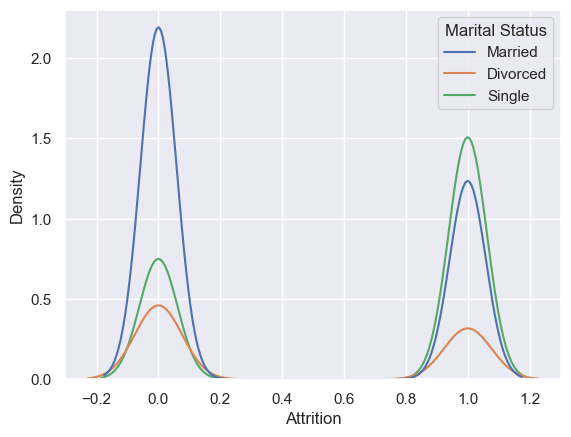

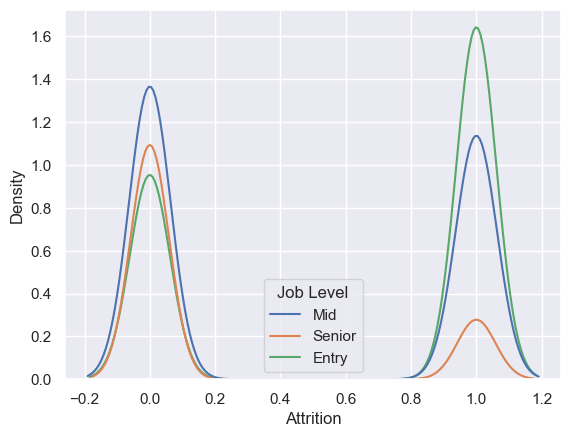

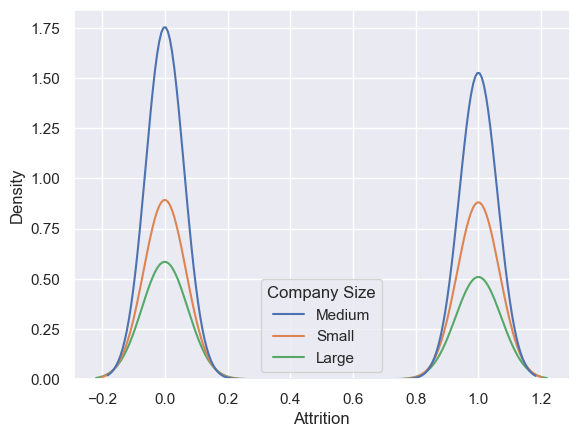

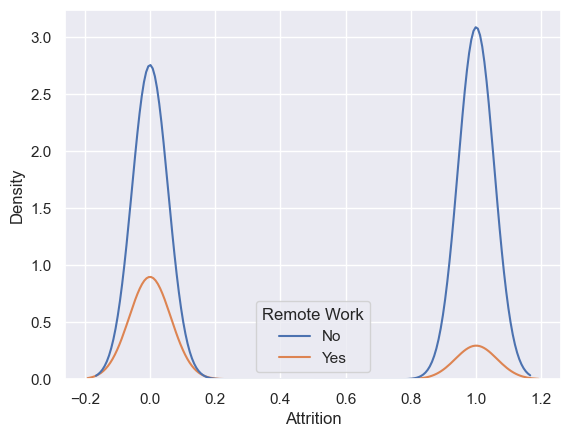

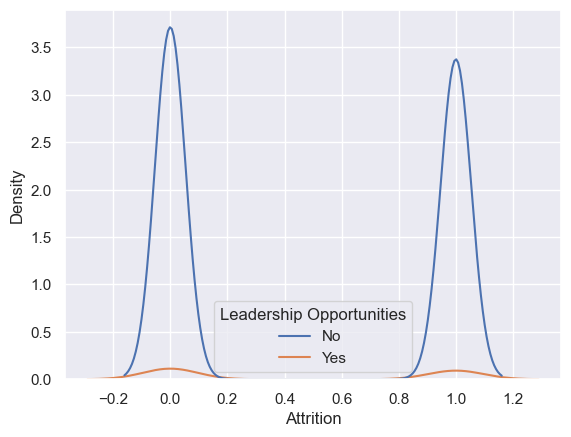

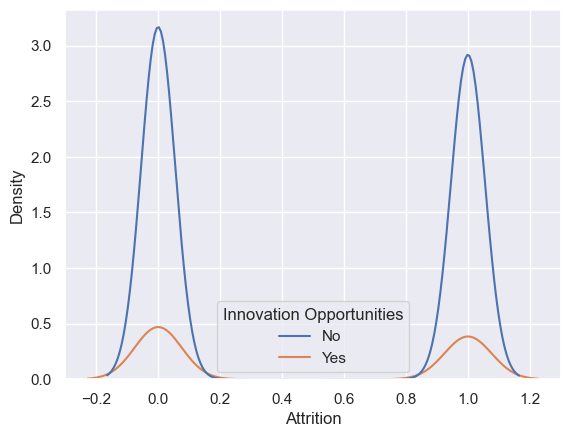

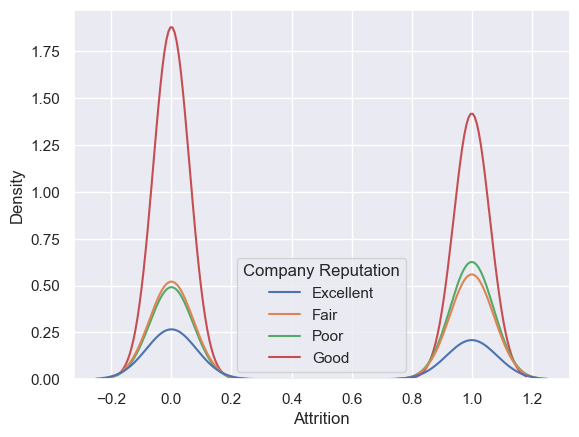

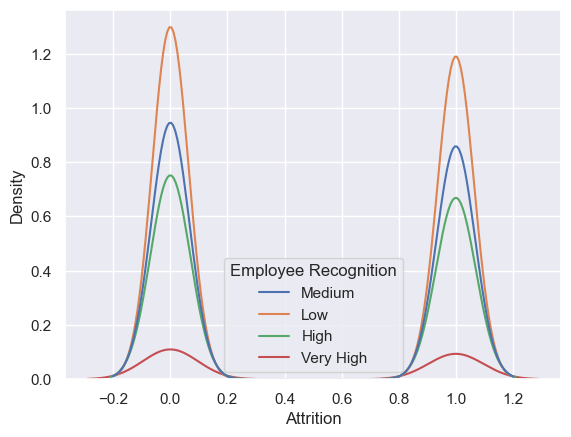

In [16]:
#KDE Analysis is a visual distribution that helps in immediate understanding of the effect of variables on target
for col in obj_cols:
    if col!= 'Attrition':
        sns.kdeplot(data = data, x = 'Attrition', hue = col)
        plt.show()

**1. It can be inferred that marital status, remote work availability and job level played an important role in their decision for attrition.**
**2. Company reputation has slight impact.**
**3. Interesting to note that Job Satisfaction didn't show any significant relationship. It can be presumed that a fair amount of external factors affect the attrition.**

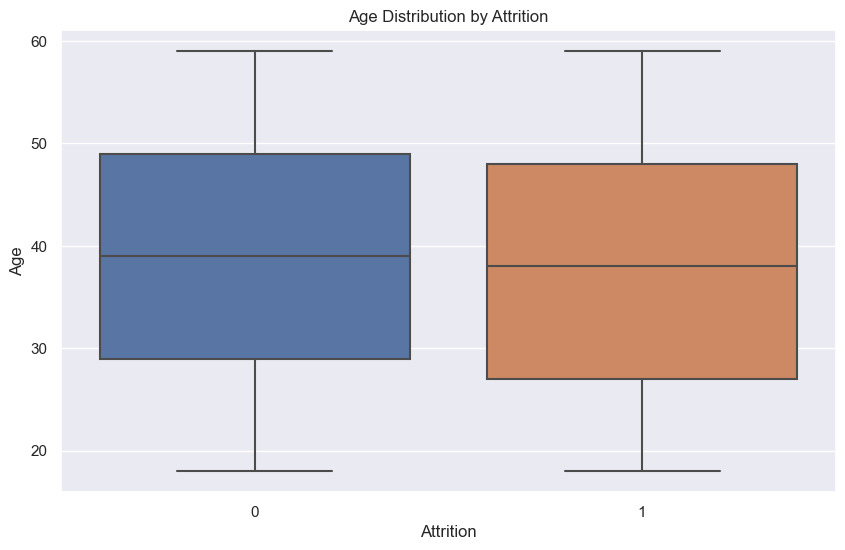

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age Distribution by Attrition')
plt.show()

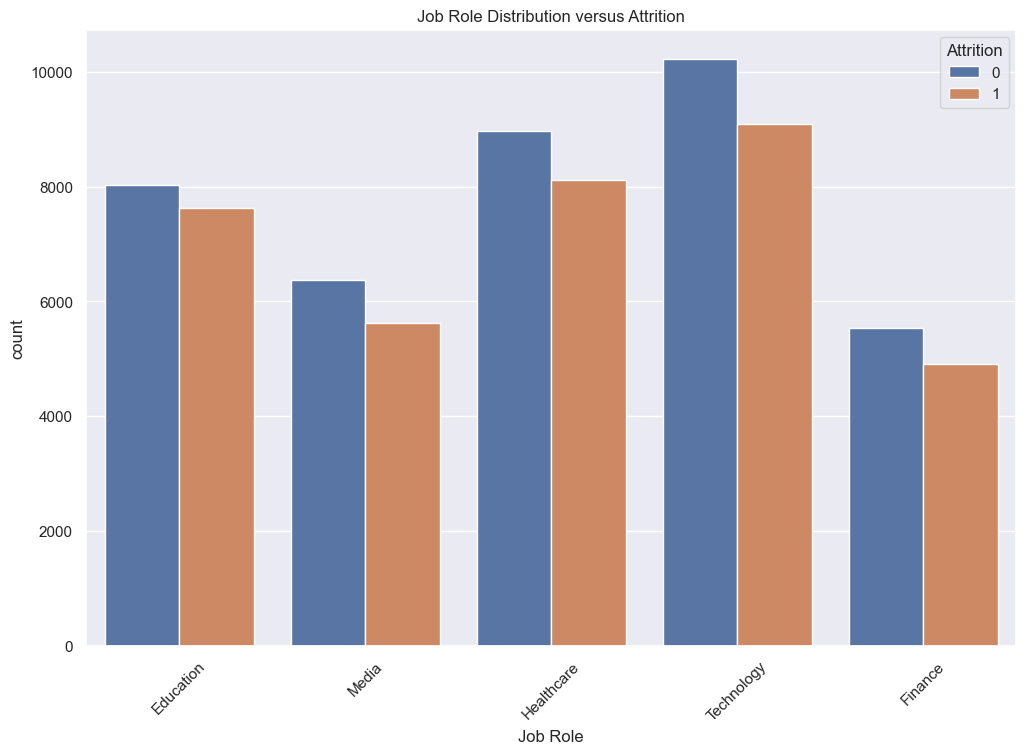

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Job Role', hue='Attrition', data=data)
plt.xticks(rotation=45)
plt.title('Job Role Distribution versus Attrition')
plt.show()

In [19]:
#To find relationship between Salary and Attrition
salary_bin = [0,3000,6000,9000,12000,15000,18000]
salary_labels = [1,2,3,4,5,6]
data['Income'] = pd.cut(data['Monthly Income'], bins = salary_bin, labels = salary_labels, right = False)

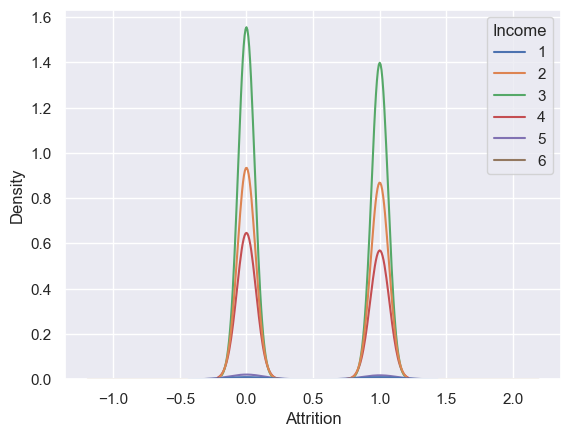

In [20]:
sns.kdeplot(data = data, x = 'Attrition', hue = 'Income')
plt.show()

**Income doesn't show any significant relationship to attrition**

In [21]:
data.drop('Income', axis = 1, inplace = True)

In [22]:
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

In [23]:
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-29', '30-39', '40-49', '50-59']

years_bins = [0, 10, 20, 30, 40, 50, 60]
years_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-51']  
data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
data['Years at Company'] = pd.cut(data['Years at Company'], bins=years_bins, labels=years_labels)

binary_cols = ['Gender', 'Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
def binary_handling(value):
    if value == 'Yes' or value == 'Male':
        return 1
    else:
        return 0

data[binary_cols] = data[binary_cols].applymap(binary_handling)

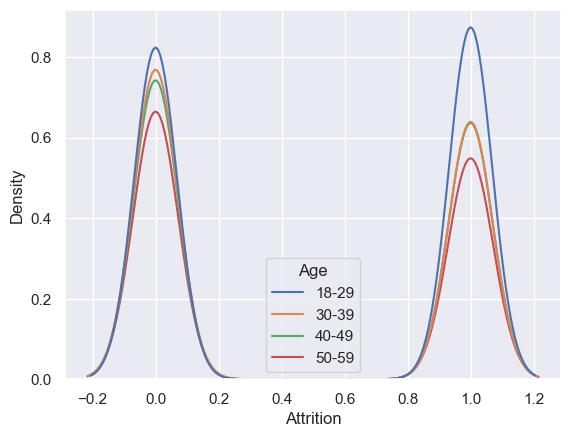

In [24]:
sns.kdeplot(data = data, x = 'Attrition', hue = 'Age')
plt.show()

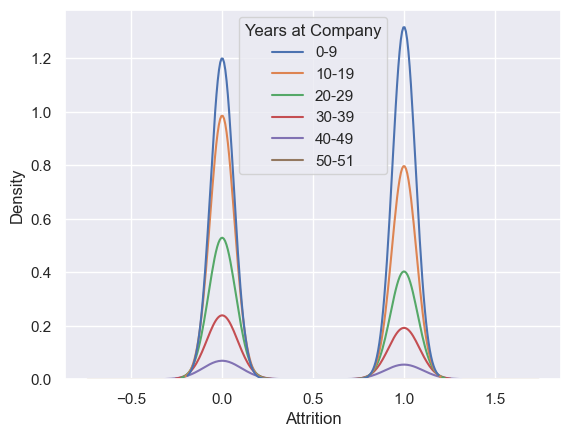

In [25]:
sns.kdeplot(data = data, x = 'Attrition', hue = 'Years at Company')
plt.show()

**Age Group and Salary doesnt show any significant relationship as well**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Employee ID               74498 non-null  int64   
 1   Age                       72796 non-null  category
 2   Gender                    74498 non-null  int64   
 3   Years at Company          74498 non-null  category
 4   Job Role                  74498 non-null  object  
 5   Monthly Income            74498 non-null  int64   
 6   Work-Life Balance         74498 non-null  object  
 7   Job Satisfaction          74498 non-null  object  
 8   Performance Rating        74498 non-null  object  
 9   Number of Promotions      74498 non-null  float64 
 10  Overtime                  74498 non-null  int64   
 11  Distance from Home        74498 non-null  int64   
 12  Education Level           74498 non-null  object  
 13  Marital Status            74498 non-null  obje

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

obj_cols = data.select_dtypes(include = ['object', 'category']).columns
for col in obj_cols:
    data[col] = le.fit_transform(data[col])

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data['Monthly Income'] = sc.fit_transform(data[['Monthly Income']])

In [29]:
data.set_index('Employee ID', inplace=True)

In [30]:
data

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,,,,,,,,
8410,1,1,1,0,-0.887054,0,2,0,2.0,0,22,0,1,0.0,1,1,89,0,0,0,0,2,0
64756,3,0,0,3,-0.820155,3,0,3,3.0,0,21,3,0,3.0,1,1,21,0,0,0,1,1,0
30257,0,0,0,2,0.399360,2,0,3,0.0,0,11,1,1,3.0,1,1,74,0,0,0,3,1,0
65791,1,0,0,0,-1.537927,2,0,2,1.0,0,27,2,2,2.0,1,2,50,1,0,0,2,2,0
65026,3,1,4,0,-1.151399,1,3,0,0.0,1,71,2,0,0.0,2,1,68,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,3,0,4,2,0.246514,3,2,0,0.0,1,40,0,2,0.0,2,1,60,0,0,0,3,2,0
47175,0,0,1,0,-1.599716,2,2,0,2.0,1,45,3,1,0.0,0,1,20,0,0,0,2,2,1
12409,3,1,0,0,-0.764406,2,3,1,0.0,0,4,0,1,4.0,1,2,7,0,0,0,2,0,1


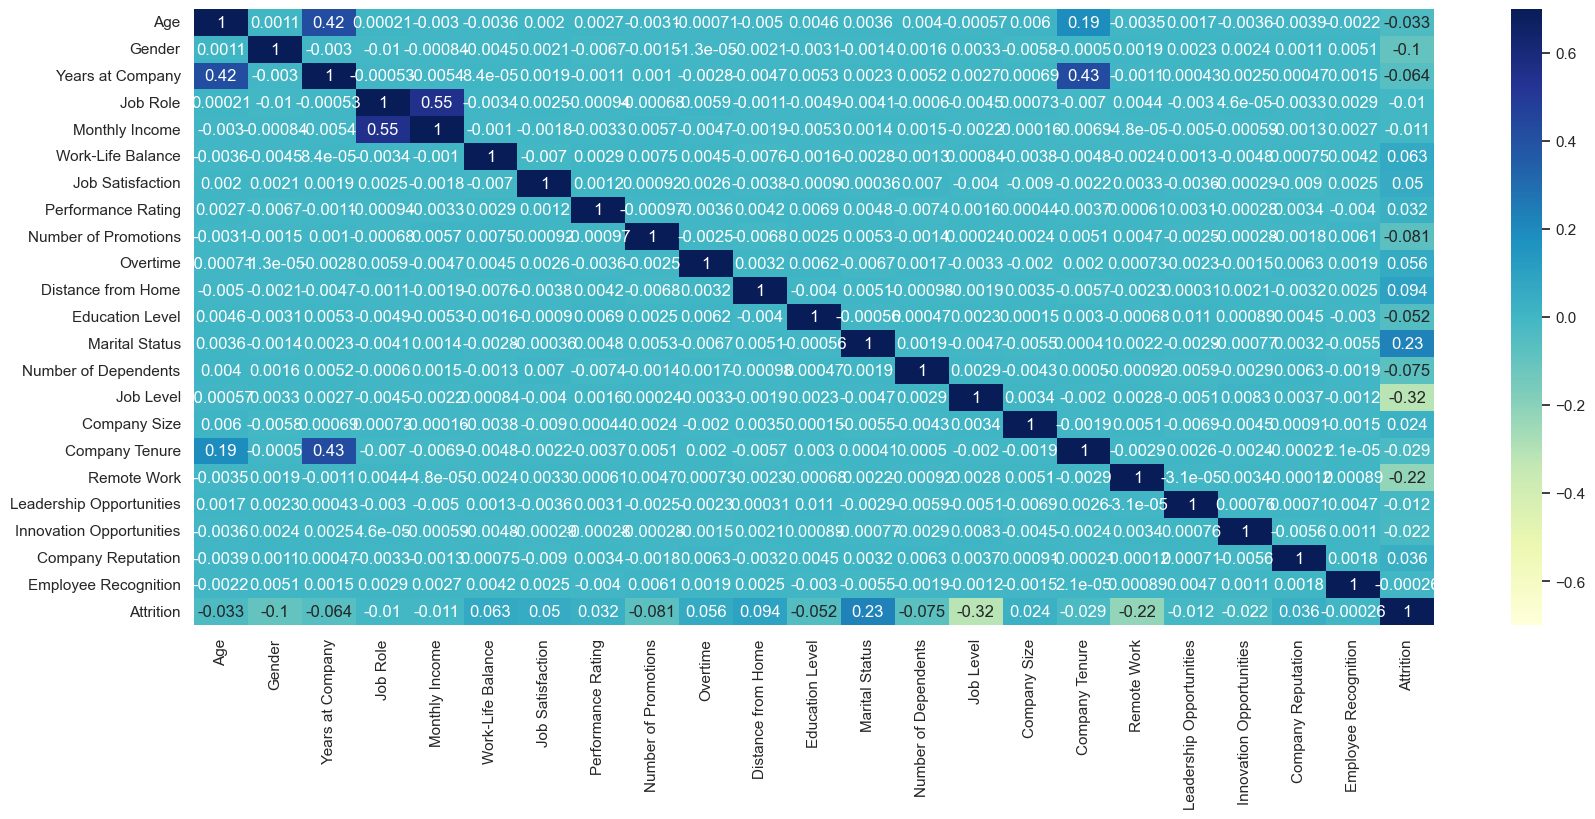

In [31]:
plt.subplots(figsize = (20,8))
sns.heatmap(data.corr(), vmin = -0.7, vmax = 0.7, annot = True, cmap = 'YlGnBu')
plt.show()

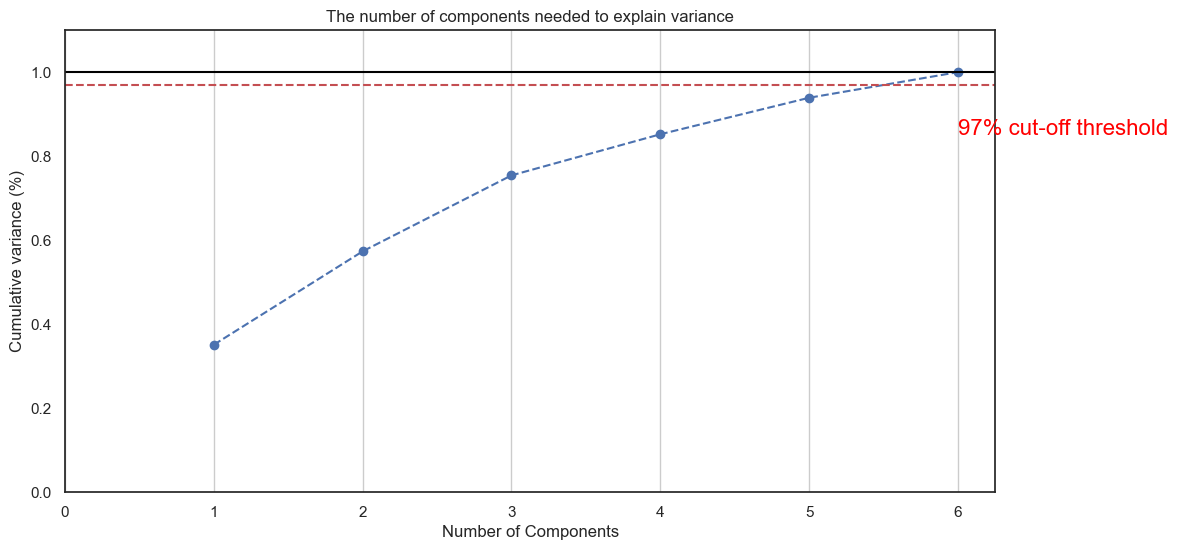

In [32]:
from sklearn.decomposition import PCA
x = data[['Gender', 'Overtime', 'Work-Life Balance', 'Marital Status',
          'Job Level', 'Remote Work']]
sns.set(style = 'white')
pca = PCA().fit(x)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 7, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.97, color='r', linestyle='--')
plt.axhline(y= 1, color='black', linestyle='-')
plt.text(6, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [33]:
pca = PCA(n_components= 6)
xpca = pca.fit_transform(x)
y = data.Attrition

In [34]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(xpca, y, test_size=0.33, random_state = 42)

In [35]:
#Logistic Regression is suitable for a binary classification

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter= 1000)

log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
log.score(x_test, y_test)

0.7022167988610941

In [37]:
print(classification_report(y_test, log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     12816
           1       0.70      0.67      0.68     11769

    accuracy                           0.70     24585
   macro avg       0.70      0.70      0.70     24585
weighted avg       0.70      0.70      0.70     24585



**The Recall value is only 0.67. Which means only 67% of the true values could be predicted with logistic regression**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [39]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72     12816
           1       0.70      0.66      0.68     11769

    accuracy                           0.70     24585
   macro avg       0.70      0.70      0.70     24585
weighted avg       0.70      0.70      0.70     24585



**A recall vallue less than 70%. We will move on to the next model**

In [40]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
print(classification_report(y_test, xgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     12816
           1       0.71      0.72      0.71     11769

    accuracy                           0.72     24585
   macro avg       0.72      0.72      0.72     24585
weighted avg       0.72      0.72      0.72     24585



**72% is an actually good model**

In [42]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators= 300, n_jobs= -1)
random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [43]:
print(classification_report(y_test, random.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     12816
           1       0.71      0.72      0.71     11769

    accuracy                           0.72     24585
   macro avg       0.72      0.72      0.72     24585
weighted avg       0.72      0.72      0.72     24585



In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
}

xgbc = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgbc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best model: {:.4f}".format(accuracy))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.7230
Test set accuracy with best model: 0.7252


In [45]:
xgbc =  XGBClassifier(**best_params)

In [46]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
print(classification_report(y_test, xgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74     12816
           1       0.71      0.72      0.71     11769

    accuracy                           0.73     24585
   macro avg       0.72      0.72      0.72     24585
weighted avg       0.73      0.73      0.73     24585



**XGBCLassifier is the best model for prediction since the priority class 1 can be deducted with a 72% accuracy and has decent Recall as well as Precision Score. A model perform well when both Recall and Precision are similar and of higher value**

In [48]:
skf = StratifiedKFold(n_splits=5)
cvscores = cross_val_score(xgbc, xpca, y, cv = skf, scoring = 'recall')
print(f'Mean Cross-Validation Recall Score: {cvscores.mean():.4f}')

Mean Cross-Validation Recall Score: 0.7092


**We can predict attrition with 70% confidence using this model**